In [1]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import utils
import pandas as pd
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.preprocessing import image

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
single_image= X_train[2]

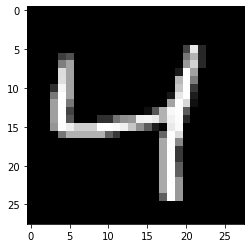

In [4]:
plt.imshow(single_image,cmap='gray')

In [5]:
X_train.min()

0

In [6]:
X_train.max()

255

In [7]:
X_train_scaled = X_train/255.0
X_test_scaled = X_test/255.0

In [8]:
y_train[2]

4

In [9]:
y_train_onehot = utils.to_categorical(y_train,10)
y_test_onehot = utils.to_categorical(y_test,10)

In [10]:
type(y_train_onehot)

numpy.ndarray

In [11]:
y_train_onehot.shape

(60000, 10)

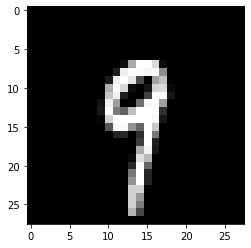

In [12]:
single_image = X_train[600]
plt.imshow(single_image,cmap='gray')

In [13]:
y_train_onehot[600]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [14]:
X_train_scaled = X_train_scaled.reshape(-1,28,28,1)
X_test_scaled = X_test_scaled.reshape(-1,28,28,1)

In [15]:
model=keras.Sequential()
layer1=layers.Conv2D(filters=25, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1))
model.add(layer1)
layer2=layers.MaxPooling2D((2, 2))
model.add(layer2)
layer3=layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu')
model.add(layer3)
layer4=layers.MaxPooling2D((2, 2))
model.add(layer4)
layer5=layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu')
model.add(layer5)
layer6=layers.MaxPooling2D((2, 2))
model.add(layer6)
layer7=layers.Flatten()
model.add(layer7)
layer8=layers.Dense(64, activation='relu')
model.add(layer8)
layer9=layers.Dense(10, activation='softmax')
model.add(layer9)


In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 25)        250       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 25)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        14464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 1, 1, 64)         0

In [17]:
model.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

In [19]:
model.fit(X_train_scaled ,y_train_onehot, epochs=5,
          batch_size=64, 
          validation_data=(X_test_scaled,y_test_onehot))

Epoch 1/5
938/938 [==============================] - 29s 31ms/step - loss: 0.1777 - accuracy: 0.9451 - val_loss: 0.1134 - val_accuracy: 0.9644
Epoch 2/5
938/938 [==============================] - 29s 31ms/step - loss: 0.0908 - accuracy: 0.9725 - val_loss: 0.0673 - val_accuracy: 0.9801
Epoch 3/5
938/938 [==============================] - 29s 31ms/step - loss: 0.0665 - accuracy: 0.9797 - val_loss: 0.0666 - val_accuracy: 0.9815
Epoch 4/5
938/938 [==============================] - 29s 31ms/step - loss: 0.0531 - accuracy: 0.9839 - val_loss: 0.0674 - val_accuracy: 0.9811
Epoch 5/5
938/938 [==============================] - 29s 31ms/step - loss: 0.0432 - accuracy: 0.9862 - val_loss: 0.0586 - val_accuracy: 0.9835


In [20]:
metrics = pd.DataFrame(model.history.history)

In [21]:
metrics.head()

,loss,accuracy,val_loss,val_accuracy
0,0.177729,0.945100,0.113444,0.9644
1,0.090758,0.972483,0.067338,0.9801
2,0.066457,0.979700,0.066572,0.9815
3,0.053057,0.983883,0.067449,0.9811
4,0.043234,0.986233,0.058558,0.9835


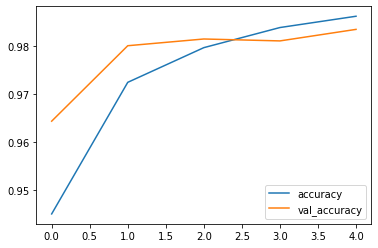

In [22]:
metrics[['accuracy','val_accuracy']].plot()

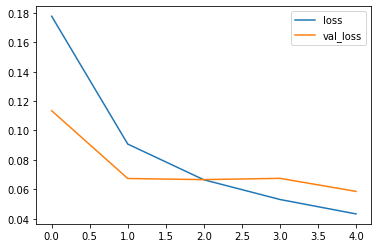

In [23]:
metrics[['loss','val_loss']].plot()

In [24]:
x_test_predictions = np.argmax(model.predict(X_test_scaled), axis=1)

In [25]:
print(confusion_matrix(y_test,x_test_predictions))

[[ 964    1    1    1    0    1    1    7    0    4]
 [   0 1127    0    2    0    1    0    4    1    0]
 [   2    0 1006    6    0    0    0   18    0    0]
 [   0    0    1 1005    0    2    0    2    0    0]
 [   2    1    3    1  962    0    1    2    0   10]
 [   2    0    0    4    0  882    1    2    1    0]
 [   3    2    0    1    3    9  940    0    0    0]
 [   0    2    9    2    0    1    0 1011    1    2]
 [   3    0    2    6    2    5    0    2  947    7]
 [   2    0    0    0    1   10    0    4    1  991]]


In [26]:
print(classification_report(y_test,x_test_predictions))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.97      0.98      1032
           3       0.98      1.00      0.99      1010
           4       0.99      0.98      0.99       982
           5       0.97      0.99      0.98       892
           6       1.00      0.98      0.99       958
           7       0.96      0.98      0.97      1028
           8       1.00      0.97      0.98       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



Prediction for another image


In [96]:
img = image.load_img('image1.jpeg')
img_tensor = tf.convert_to_tensor(np.asarray(img))
img_28 = tf.image.resize(img_tensor,(28,28))
img_28_gray = tf.image.rgb_to_grayscale(img_28)
img_28_gray_scaled = img_28_gray.numpy()/255.0

In [97]:
x_single_prediction = np.argmax(
    model.predict(img_28_gray_scaled.reshape(1,28,28,1)),
     axis=1)

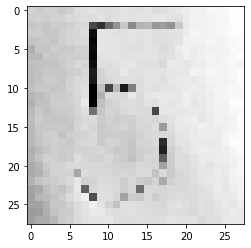

In [98]:
plt.imshow(img_28_gray_scaled.reshape(28,28),cmap='gray')

In [99]:
img_28_gray_inverted = 255.0-img_28_gray
img_28_gray_inverted_scaled = img_28_gray_inverted.numpy()/255.0

In [100]:
x_single_prediction = np.argmax(
    model.predict(img_28_gray_inverted_scaled.reshape(1,28,28,1)),
     axis=1)

In [101]:
print(x_single_prediction)

[5]
